# Coherent Detection Simulation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn
from ipywidgets import interact
import scipy.fftpack


c:\python34\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


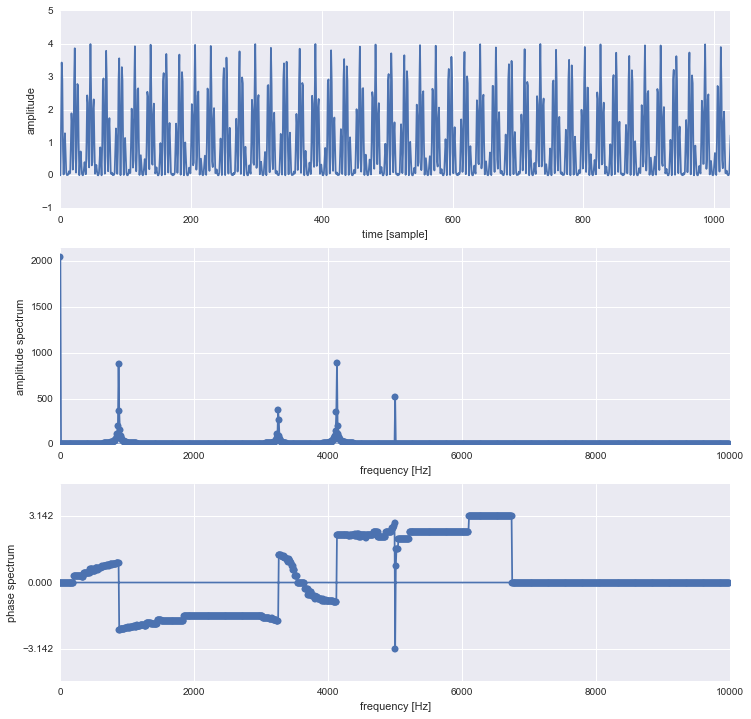

In [2]:
@interact(f1=[0,5000],f2=[0,5000])
def plot_spectrum(f1,f2):
    
    plt.figure(figsize=(12,12))
    
    max_time = 3
    rate = 20000
    times = np.linspace(0,max_time,rate*max_time)
    a = np.sin(2*np.pi*f1*times)
    b = np.sin(2*np.pi*f2*times)
    x = (a+b)**2

    start = 0  # サンプリングする開始位置
    N = 2048    # FFTのサンプル数
    fs = 20000

    X = np.fft.fft(x[start:start+N])# FFT
#    X = scipy.fftpack.fft(x[start:start+N])         # scipy版

    freqList = np.fft.fftfreq(N, d=1.0/fs)  # 周波数軸の値を計算
#    freqList = scipy.fftpack.fftfreq(N, d=1.0/ fs)  # scipy版

    amplitudeSpectrum = [np.sqrt(c.real ** 2 + c.imag ** 2) for c in X]  # 振幅スペクトル
    phaseSpectrum = [np.arctan2(int(c.imag), int(c.real)) for c in X]    # 位相スペクトル

    # 波形を描画
    ax = plt.subplot(311)  # 3行1列のグラフの1番目の位置にプロット
    #ax.plot(range(start, start+N), a[start:start+N]**2)
    #ax.plot(range(start, start+N), b[start:start+N]**2)
    ax.plot(range(start, start+N), x[start:start+N])
    ax.set_xlabel("time [sample]")
    ax.set_ylabel("amplitude")
    ax.set_xlim(0,N/2)
    ax.set_ylim(np.min(x)-1,np.max(x)+1)

    # 振幅スペクトルを描画
    ax = plt.subplot(312)
    ax.plot(freqList, amplitudeSpectrum, marker= 'o', linestyle='-')
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("amplitude spectrum")
    ax.set_xlim(0,10000)
    ax.set_ylim(0,np.max(amplitudeSpectrum)+100)

    # 位相スペクトルを描画
    ax = plt.subplot(313)
    ax.plot(freqList, phaseSpectrum, marker= 'o', linestyle='-')
    ax.set_xlabel("frequency [Hz]")
    ax.set_ylabel("phase spectrum")
    ax.set_yticks([np.pi*(-1),0,np.pi,np.pi*2])
    ax.set_xlim(0,10000)
    ax.set_ylim(np.min(phaseSpectrum)-1.5,np.max(phaseSpectrum)+1.5)